In [1]:
# Daniel Schacher, HW3, with update compairing efficiency with vs. with out numba library
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import time


In [2]:
@jit
def mandelbrot(RE ,IM, MaxIter):
    c = complex(RE, IM)
    z = 0.0j
    
    for i in range(MaxIter):
        z = z*z + c
        if ((z.real**2 + z.imag**2) >= 4):
            return i
    return MaxIter

In [3]:
@jit
def plotTheBrot(i):
    t1 = time.time()
    columns = 2000
    rows = 2000

    results = np.zeros([rows , columns])
    for row, RE in enumerate(np.linspace(-2 , 1, rows)):
        for col, IM in  enumerate(np.linspace(-1, 1, columns)):
            results[row , col] = mandelbrot(RE, IM, i)
        


    plt.figure(0, dpi = 100)
    plt.imshow(results.T, cmap='binary', interpolation= 'bilinear', extent=[-2,1,-1,1])
    plt.xlabel('RE')
    plt.ylabel('IM')
    t2 = time.time()
    ct = t2 - t1
    print('Time taken to compute: ' , ct)
    return (ct)


def mandelbrot2(RE ,IM, MaxIter):
    c = complex(RE, IM)
    z = 0.0j
    
    for i in range(MaxIter):
        z = z*z + c
        if ((z.real**2 + z.imag**2) >= 4):
            return i
    return MaxIter


def plotTheBrot2(i):
    
    t3 = time.time()
    columns = 2000
    rows = 2000
    
    results = np.zeros([rows , columns])
    for row, RE in enumerate(np.linspace(-2 , 1, rows)):
        for col, IM in  enumerate(np.linspace(-1, 1, columns)):
            results[row , col] = mandelbrot2(RE, IM, i)
        
    plt.figure(1, dpi = 100)
    plt.imshow(results.T, cmap='binary', interpolation= 'bilinear', extent=[-2,1,-1,1])
    plt.xlabel('RE')
    plt.ylabel('IM')


    t4 = time.time()
    ct2 = t4 - t3
    print('Time taken to compute: ' , ct2)
    return ct2




Time taken to compute:  0.2803056240081787
Time taken to compute:  5.8003010749816895
Time taken to compute:  0.06606006622314453
Time taken to compute:  7.606173515319824
Time taken to compute:  0.0926516056060791
Time taken to compute:  9.65578031539917
Time taken to compute:  0.14464807510375977
Time taken to compute:  12.656679630279541
Time taken to compute:  0.24304962158203125
Time taken to compute:  18.176920175552368


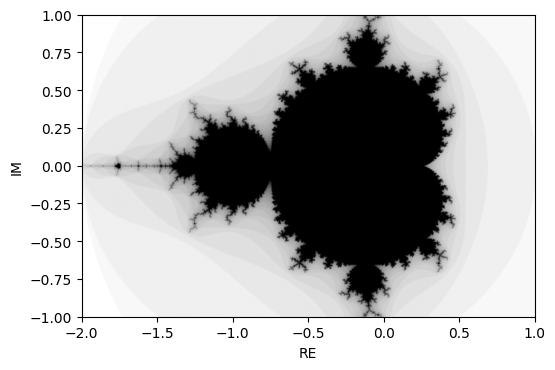

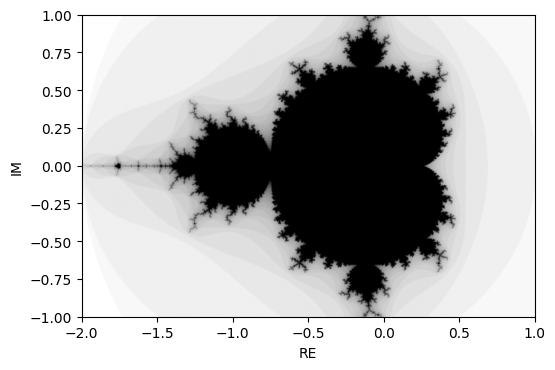

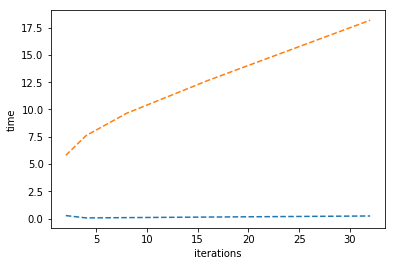

In [4]:
y = []
y2 = []
x = [2, 4, 8, 16, 32]

for i in range (1, 6):
    iterations = 2 ** i
    y.append(plotTheBrot(iterations))
    y2.append(plotTheBrot2(iterations))
    
plt.figure(2)
plt.xlabel('iterations')
plt.ylabel('time')
plt.plot(x , y,  label='with jit')
plt.plot(x , y2,  label='without jit')

plt.figure(3)
plt.plot(y, y2)

TypeError: Object of type 'ndarray' is not JSON serializable

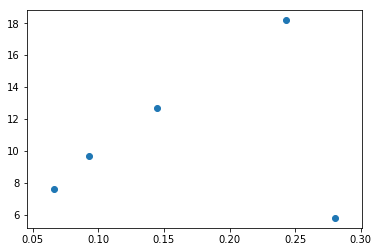

In [6]:

plt.figure(3)
plt.scatter(y, y2)